# DOWNLOADING DATA

## The CSV (comma-separated values) File Format

Let's begin with a small set of CSV-formatted data recorded in Sitka.

In [1]:
#1. This code examines the first line of the file, which contains a series of headers for the data

#import csv module
import csv

filename = 'sitka_weather_07-2014.csv'

#open the file and store the resulting file object in f_obj
with open(filename) as f_obj:
    reader = csv.reader(f_obj) #to create a reader object assoc with that file 
    header_row = next(reader) #the next() function returns the next line in the file
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


In [2]:
#2. Printing the Headers and Their Positions

import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for i, column_header in enumerate(header_row):
        print(i, column_header)

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


**We can see that the dates and their high temperatures are stored in columns 0 and 1. To explore this data, we'll process each row of data in the sitka csv file and extract the values with the indices 0 and 1.**

In [3]:
#3. Extracting and Reading Data: Let's read the high temp for each day

import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    max_temp = []
    for row in reader:
        max_temp.append(row[1])
        
    print(max_temp)

['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']


In [4]:
#4. Lets convert these strings values stored in the list above to numbers

import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    max_temp = []
    max_temp_digits = []
    
    for row in reader:
        max_temp.append(row[1])
    
    for val in max_temp:
        val = int(val)
        max_temp_digits.append(val)
        
    print(max_temp_digits)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


In [6]:
#5. We can eliminate one for loop from 4. above and reduce the code size

import csv

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    max_temp = []
    
    for row in reader:
        digits = int(row[1])
        max_temp.append(digits)
    
    print(max_temp)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


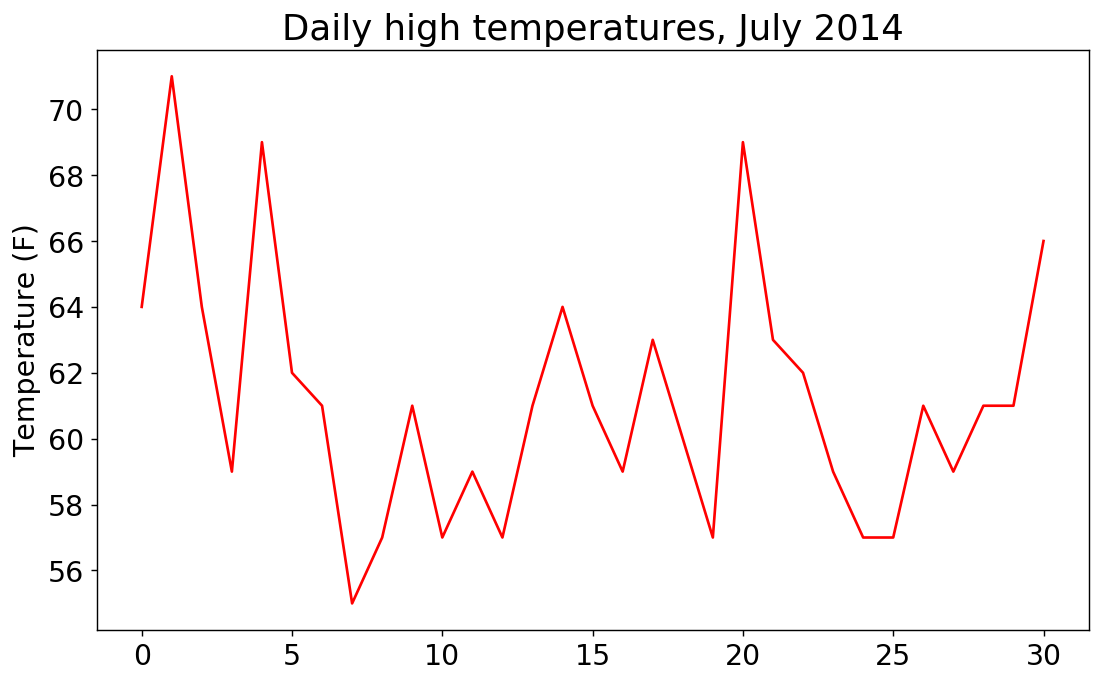

In [14]:
#6. Plotting data in a temperature chart

import csv
from matplotlib import pyplot as plt

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    max_temp = []
    
    for row in reader:
        digits = int(row[1])
        max_temp.append(digits)
        
    #plot data
    fig = plt.figure(dpi=128, figsize =(10,6)) #to generate a figure object
    plt.plot(max_temp, c='red')
    
    plt.title('Daily high temperatures, July 2014', fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature (F)', fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()

In [15]:
#7. datetime module: lets add dates to our graph

from datetime import datetime
the_date = datetime.strptime('2020-5-10', '%Y-%m-%d')
print(the_date)

2020-05-10 00:00:00


**Date and Time Formatting Arguments from the datetime module:

- %A  Weekday name, such as Monday
- %B  Month name, such as January 
- %m  Month, as a number (01 to 12) 
- %d  Day of the month, as a number (01 to 31) 
- %Y  Four-digit year, such as 2015 
- %y  Two-digit year, such as 15 
- %H  Hour, in 24-hour format (00 to 23) 
- %I  Hour, in 12-hour format (01 to 12) 
- %p  am or pm 
- %M  Minutes (00 to 59) 
- %S  Seconds (00 to 61)


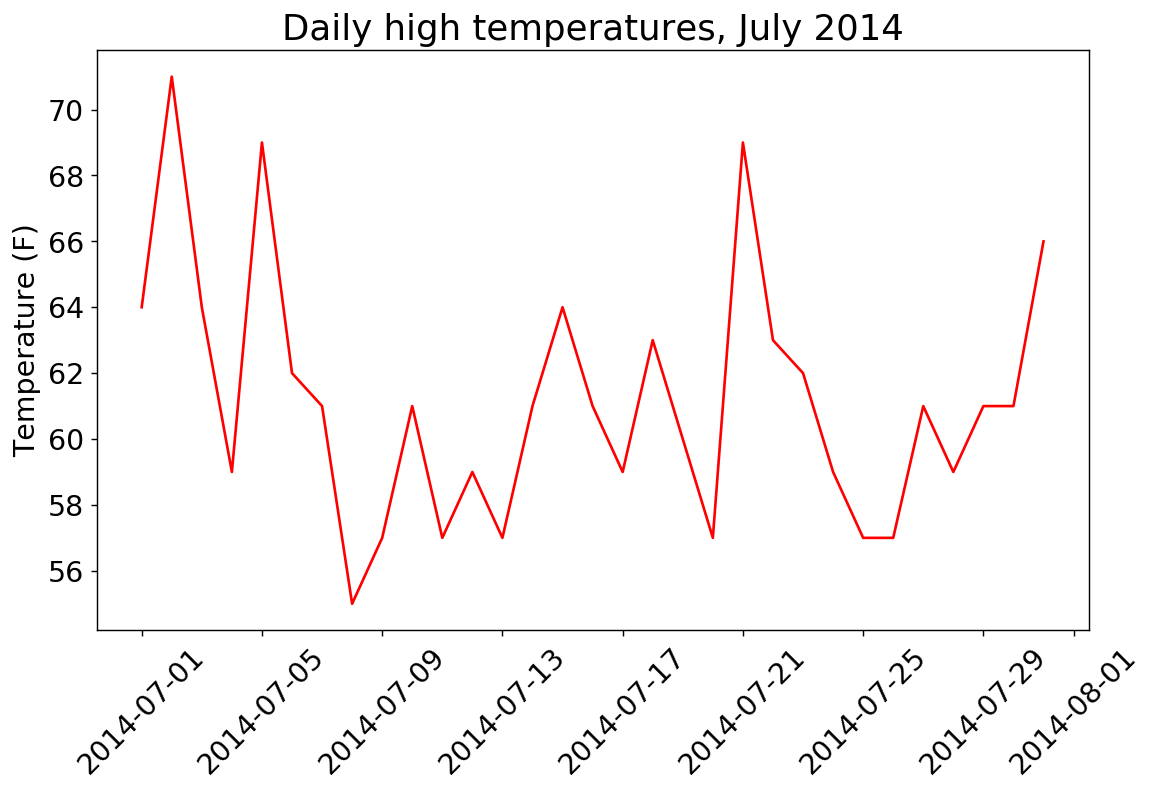

In [30]:
#8. Plotting dates from the file

import csv
from matplotlib import pyplot as plt
from datetime import datetime

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    max_temp = []
    dates = []
    
    for row in reader:
        digits = int(row[1])
        max_temp.append(digits)
        
        d_date = datetime.strptime(row[0], '%Y-%m-%d')
        dates.append(d_date)
        
    #plot data
    fig = plt.figure(dpi=128, figsize =(10,6)) #to generate a figure object
    plt.plot(dates, max_temp, c='red')
    
    plt.title('Daily high temperatures, July 2014', fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature (F)', fontsize=16)
    plt.tick_params(axis='x', which='major', labelsize=16, labelrotation=45)# to prevent overlapping
    plt.tick_params(axis='y', which='major', labelsize=16)
    
    plt.show()

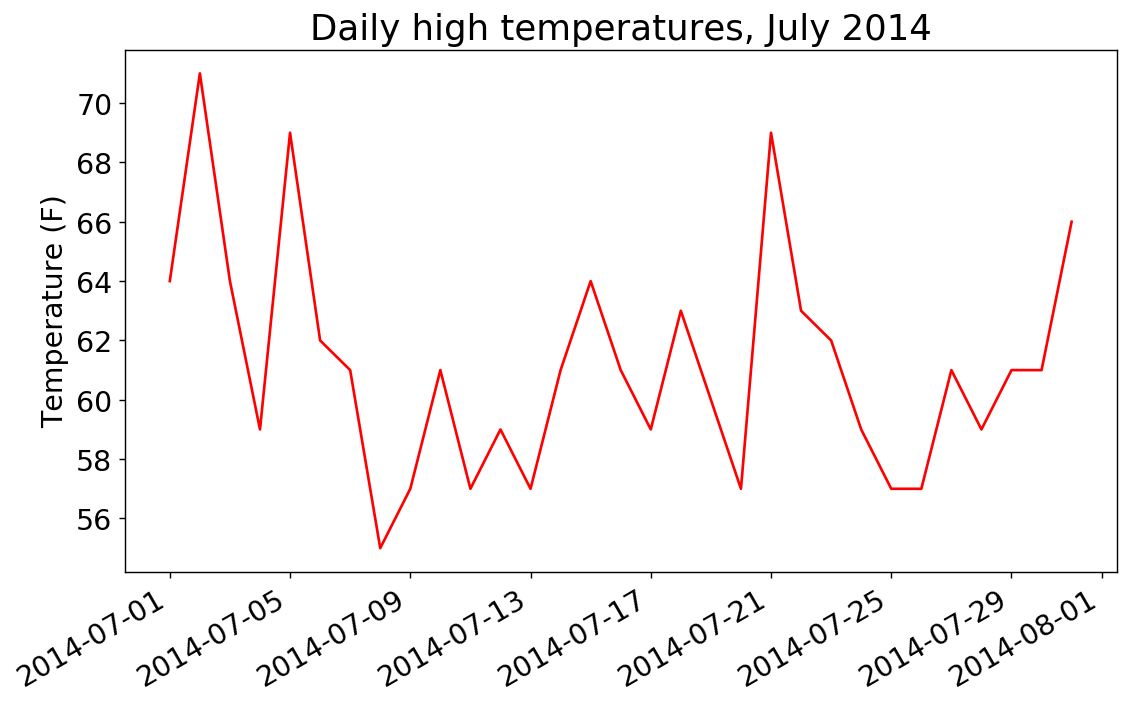

In [46]:
#9. Plotting dates from the file: we can call the fig.autofmt_xdate() to do the same manuever we used the rotation for

import csv
from matplotlib import pyplot as plt
from datetime import datetime

filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    max_temp = []
    dates = []
    
    for row in reader:
        digits = int(row[1])
        max_temp.append(digits)
        
        d_date = datetime.strptime(row[0], '%Y-%m-%d')
        dates.append(d_date)
        
    #plot data
    fig = plt.figure(dpi=128, figsize =(10,6)) #to generate a figure object
    plt.plot(dates, max_temp, c='red')
    
    plt.title('Daily high temperatures, July 2014', fontsize=20)
    plt.xlabel('', fontsize=16)
    fig.autofmt_xdate() #attribute to correct overlapping
    plt.ylabel('Temperature (F)', fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()

**Plotting a Longer Timeframe**

Now lets add more data to get a more complete picture of the weather in Sitka. Copy the file sitka_weater_2014.csv, which contains a full year’s worth of Weather Underground data for Sitka, to the folder where you’re storing this chapter’s programs. Now we can generate a graph for the entire year’s weather:
 

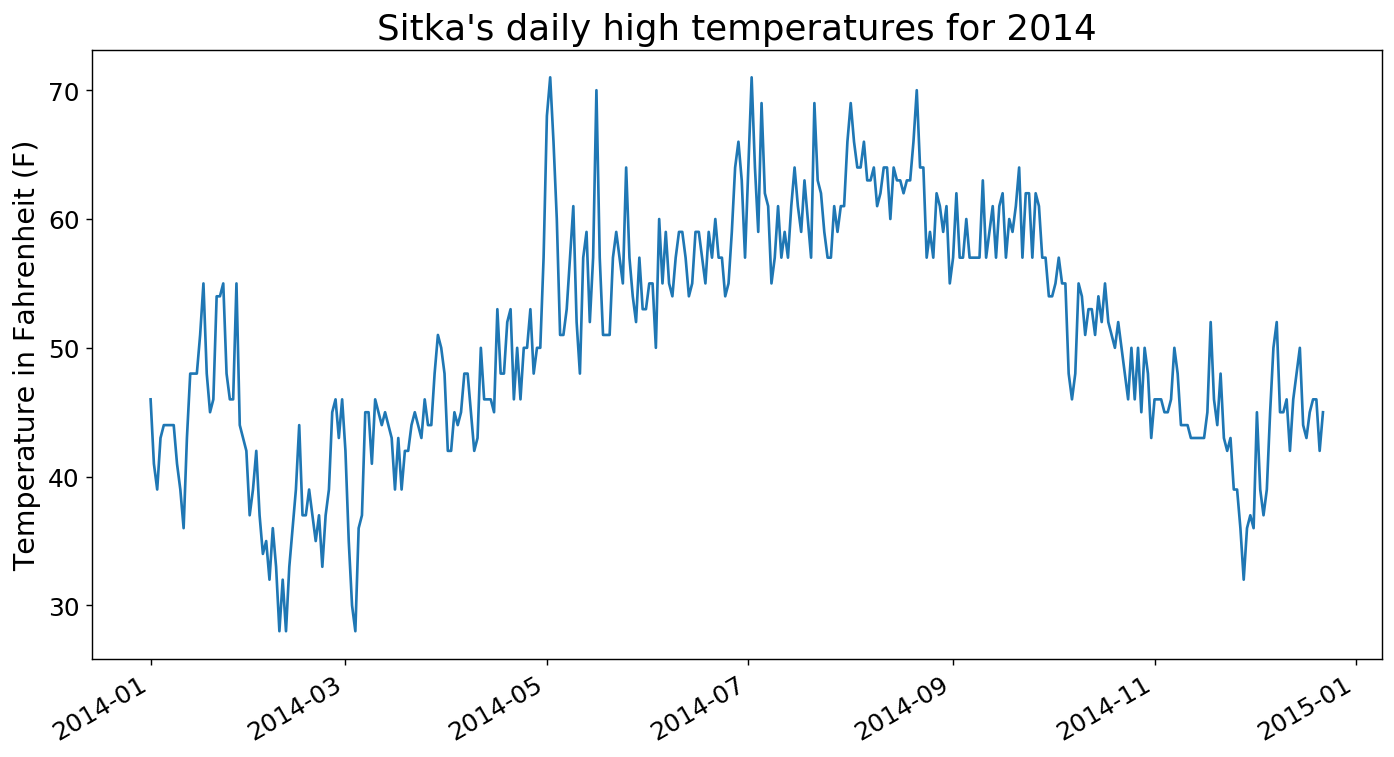

In [61]:
#10.plotting data for a year
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt

filename ='sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header = next(reader)
    
    max_temp = []
    dates = []
    
    for row in reader:
        val = int(row[1])
        max_temp.append(val)
        
        date = dt.strptime(row[0], '%Y-%m-%d')
        dates.append(date)
        
    #plotting chart
    fig = plt.figure(dpi=128, figsize=(13,7))
    plt.plot(dates, max_temp)
    
    plt.title("Sitka's daily high temperatures for 2014", fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature in Fahrenheit (F)', fontsize=16)
    fig.autofmt_xdate()
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()

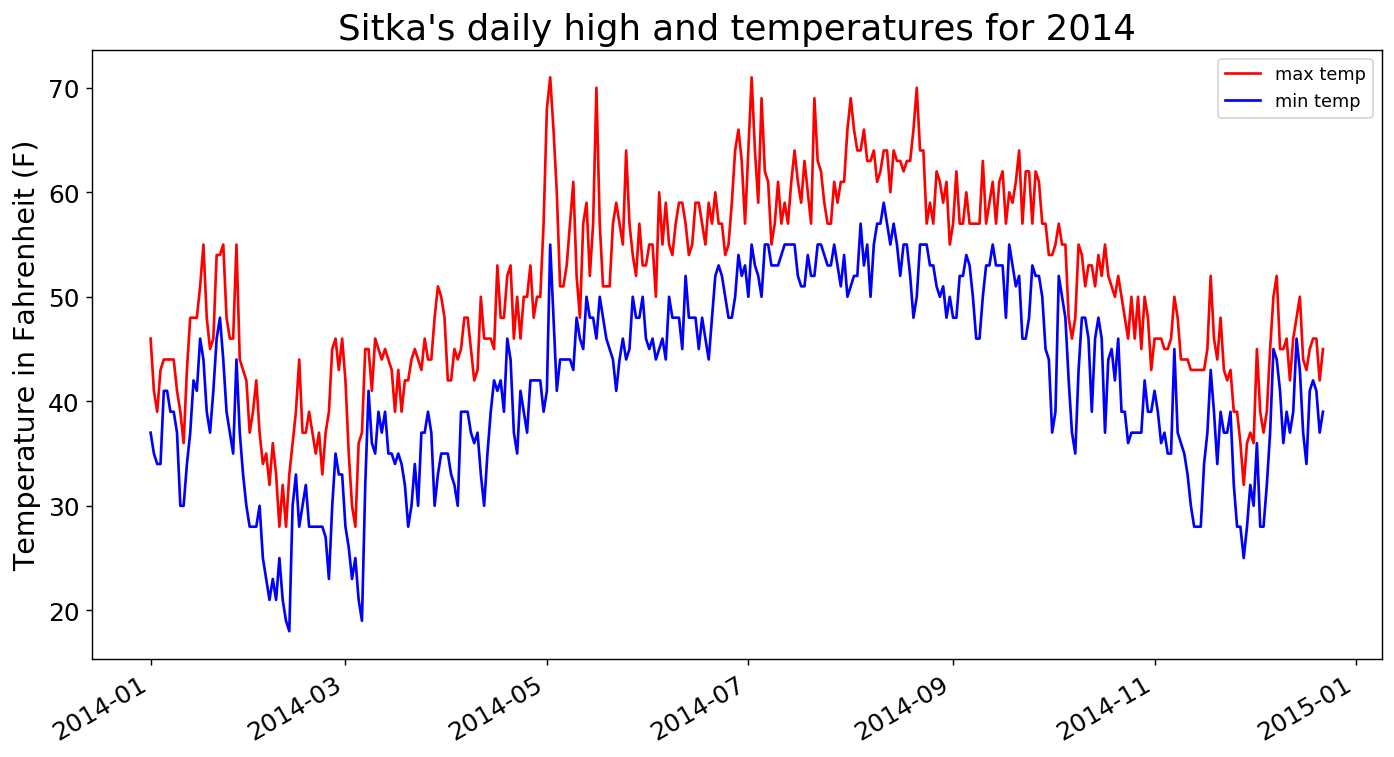

In [64]:
#11. pltting a second data series
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt

filename ='sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header = next(reader)
    
    max_temp, dates, min_temp = [], [], []
    
    for row in reader:
        val = int(row[1])
        max_temp.append(val)
        
        min_val = int(row[3])
        min_temp.append(min_val)
        
        date = dt.strptime(row[0], '%Y-%m-%d')
        dates.append(date)
        
    #plotting chart
    fig = plt.figure(dpi=128, figsize=(13,7))
    plt.plot(dates, max_temp, c='red', label='max temp')
    plt.plot(dates, min_temp, c='blue', label='min temp')
    
    plt.title("Sitka's daily high and temperatures for 2014", fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature in Fahrenheit (F)', fontsize=16)
    fig.autofmt_xdate()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend()
    
    plt.show()

**Please note**
- We can add a finishing touch to the graph by using shading to show the range btw each day's high and low temp. 
- We will use the fill_between() method, which takes a series of x-values and two series of y-values, and fills the space between the two y-value series.

In the example below, the alpha argument controls a color’s transparency. An alpha value of 0 is completely transparent, and 1 (the default) is completely opaque. By setting alpha to 0.5 we make the red and blue plot lines appear lighter. 

We pass fill_between() the list dates for the x-values and then the two y-value series highs and lows. The facecolor argument determines the color of the shaded region, and we give it a low alpha value of 0.1 so the filled region connects the two data series without distracting from the information they represent.
 

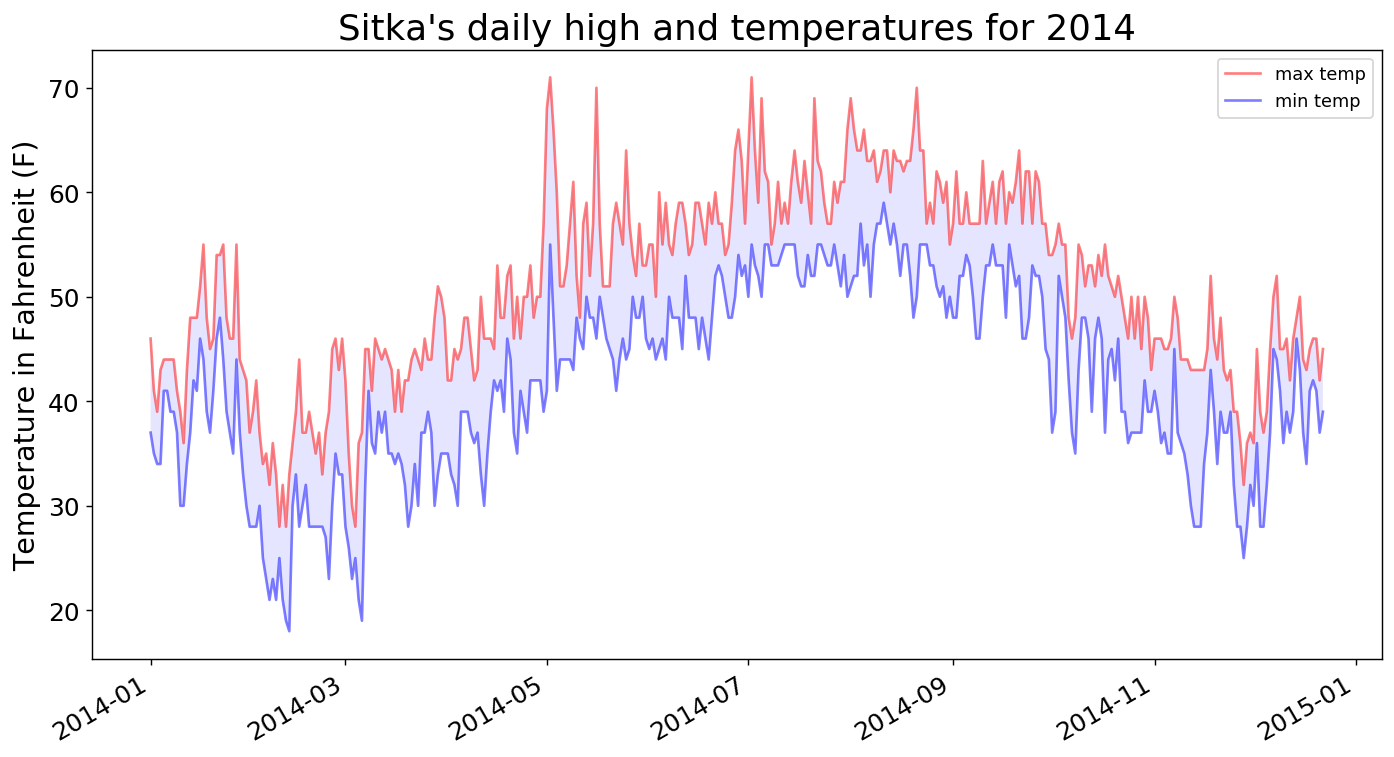

In [69]:
#12. shading an area in the chart: 

import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt

filename ='sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header = next(reader)
    
    max_temp, dates, min_temp = [], [], []
    
    for row in reader:
        val = int(row[1])
        max_temp.append(val)
        
        min_val = int(row[3])
        min_temp.append(min_val)
        
        date = dt.strptime(row[0], '%Y-%m-%d')
        dates.append(date)
        
    #plotting chart
    fig = plt.figure(dpi=128, figsize=(13,7))
    plt.plot(dates, max_temp, c='red', alpha=0.5, label='max temp')
    plt.plot(dates, min_temp, c='blue', alpha=0.5, label='min temp')
    
    #adding filler
    plt.fill_between(dates, max_temp, min_temp, facecolor='blue', alpha=0.1)
    
    plt.title("Sitka's daily high and temperatures for 2014", fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature in Fahrenheit (F)', fontsize=16)
    fig.autofmt_xdate()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend()
    
    plt.show()

## Error-Checking 

We should be able to use the code above for any location, but some weather data may not be well structured like they're supposed to. Missing data can result in exceptions that crash our programs if we don’t handle them properly. 

For example, let’s see what happens when we attempt to generate a temperature plot for Death Valley, California. Copy the file death_valley_2014.csv to the folder where you’re storing this chapter’s programs, and then change highs_lows.py to generate a graph for Death Valley:

In [73]:
#13. An example on errors 

import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt

filename ='death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header = next(reader)
    
    max_temp, dates, min_temp = [], [], []
    
    for row in reader:
        val = int(row[1])
        max_temp.append(val)
        
        min_val = int(row[3])
        min_temp.append(min_val)
        
        date = dt.strptime(row[0], '%Y-%m-%d')
        dates.append(date)
        
    #plotting chart
    fig = plt.figure(dpi=128, figsize=(13,7))
    plt.plot(dates, max_temp, c='red', alpha=0.5, label='max temp')
    plt.plot(dates, min_temp, c='blue', alpha=0.5, label='min temp')
    
    #adding filler
    plt.fill_between(dates, max_temp, min_temp, facecolor='blue', alpha=0.1)
    
    plt.title("Death Valley's daily high and temperatures for 2014", fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature in Fahrenheit (F)', fontsize=16)
    fig.autofmt_xdate()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend()
    
    plt.show()

ValueError: invalid literal for int() with base 10: ''

**Please note:**

When we run the program we get an error, as shown in the last line in the output.The traceback tells us that Python can’t process the high temperature for one of the dates because it can’t turn an empty string ('') into an integer. A look through death_valley_2014.csv shows the problem.

It seems that on February 16, 2014, no data was recorded; the string for the high temperature is empty. To address this issue, we’ll run errorchecking code when the values are being read from the CSV file to handle exceptions that might arise when we parse our data sets. Here’s how that works.
 


2014-02-15 00:00:00 data is missing.


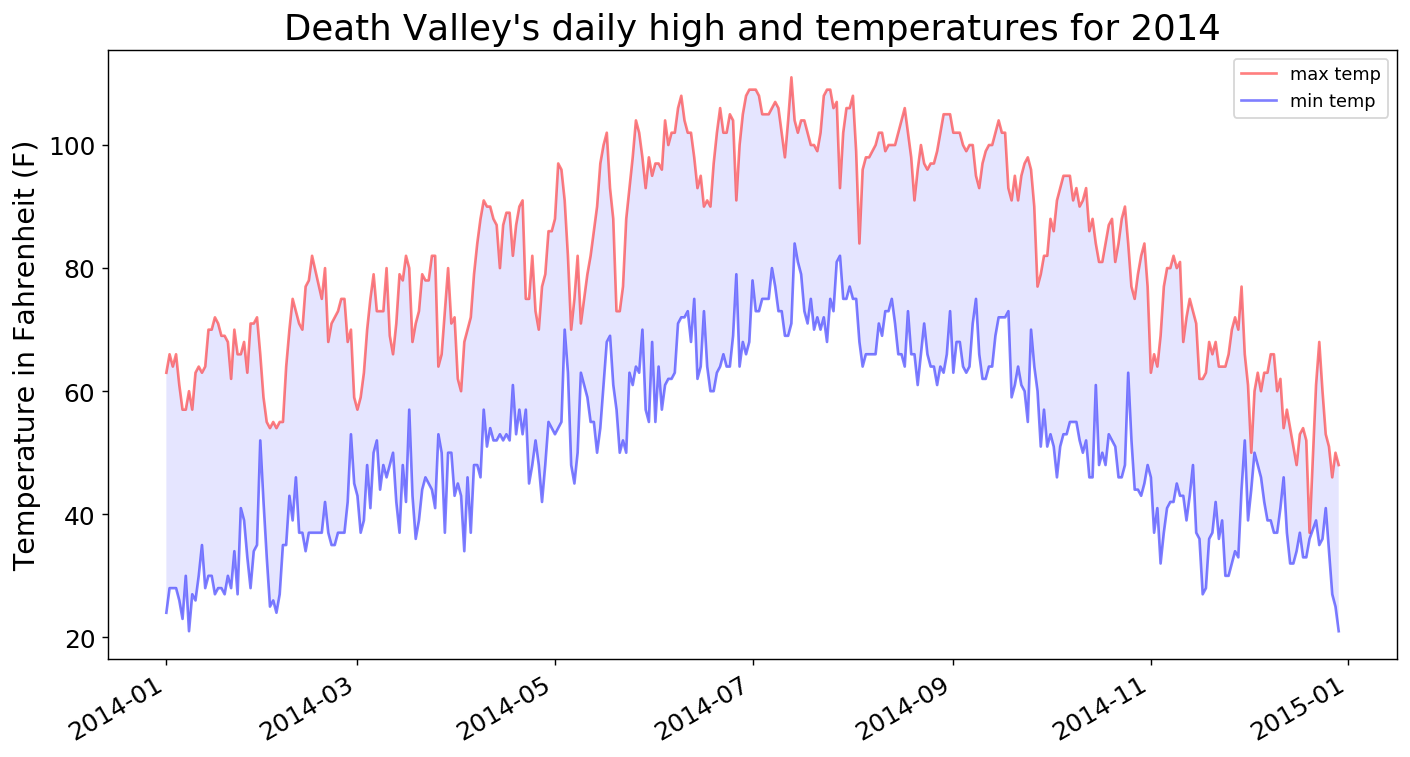

In [74]:
#14. An error checking code

import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt

filename ='death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header = next(reader)
    
    max_temp, dates, min_temp = [], [], []
    
    for row in reader:
        try:
            val = int(row[1])
            min_val = int(row[3])
            date = dt.strptime(row[0], '%Y-%m-%d')
            
        except ValueError:
            print(date, 'data is missing.')
            
        else:
            max_temp.append(val)
            min_temp.append(min_val)
            dates.append(date)
     
    #plotting chart
    fig = plt.figure(dpi=128, figsize=(13,7))
    plt.plot(dates, max_temp, c='red', alpha=0.5, label='max temp')
    plt.plot(dates, min_temp, c='blue', alpha=0.5, label='min temp')
    
    #adding filler
    plt.fill_between(dates, max_temp, min_temp, facecolor='blue', alpha=0.1)
    
    plt.title("Death Valley's daily high and temperatures for 2014", fontsize=20)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Temperature in Fahrenheit (F)', fontsize=16)
    fig.autofmt_xdate()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend()
    
    plt.show()

**Please note**

Comparing this graph to the Sitka graph, we can see that Death Valley is warmer overall than southeast Alaska, as might be expected, but also that the range of temperatures each day is actually greater in the desert. The height of the shaded region makes this clear. 

Many data sets you work with will have missing data, improperly formatted data, or incorrect data. Use the tools you learned in the first half of this book to deal with these situations. Here we used a try-except-else block to handle missing data. Sometimes you’ll use continue to skip over some data or use remove() or del to eliminate some data after it’s been extracted. You can use any approach that works, as long as the result is a meaningful, accurate visualization.